In [2]:
import pandas as pd
import stats_la as s
import pipeline as pp
from nltk.corpus import stopwords
from tqdm import tqdm
import importlib

In [28]:
df = pd.read_csv("../datasets/200_cleaned_swords.csv", nrows=1)
df

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,6301449,nytimes.com,reliable,https://query.nytimes.com/gst/fullpage.html?re...,"['[', ""'"", ""'"", ',', ' ', ""'"", 'h', 'e', ""'"", ...",2018-02-11 00:40:10.316783,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Time to Scrap the Electoral College?,NaN,NaN,"['Presidential Elections (US)', 'Electoral Col...",<br>To the Editor:\n<p>\n Re ''Drop Out of th...,NaN,NaN,nytimes


In [16]:
importlib.reload(pp)
def Tokenize_data(file, new_file):
    #stopwords_lst = stopwords.words('english')
    pp.apply_pipeline(file, [
            # Clean content
            (pp.Clean_data(), 'content'),
            (pp.Tokenizer(), 'content'),
            #(pp.Combine_Content(), "content", "content_combined")
        ],
        new_file=new_file,
        progress_bar=True,
        total_rows=1000
    )

def Get_unique_words(file):
    unique_words = pp.Generate_unique_word_list()
    pp.apply_pipeline(file, [(unique_words, None)], progress_bar=True)
    return unique_words

Tokenize_data("../datasets/100k-raw.csv", "../datasets/200_cleaned.csv")
vocab1 = Get_unique_words("../datasets/200_cleaned.csv")

vocab_list = vocab1.get_unique_words(0,1)








100%|██████████| 1000/1000 [00:00<00:00, 19669.96it/s]


Finished processing
processed 1000 rows
finish time: 2.413019895553589


100%|██████████| 1000/1000 [00:03<00:00, 329.28it/s]


Finished processing
processed 1000 rows
finish time: 3.077237844467163
Vocabulary
30059


In [32]:
importlib.reload(pp)
def Remove_stopwords(file, new_file):
    sw = stopwords.words('english')
    pp.apply_pipeline(file, [
            # Clean content
            (pp.Read_String_Lst(), "content"),
            (pp.Remove_stopwords2(), 'content'),
            
        ],
        new_file=new_file,
        progress_bar=True,
    ) 
Remove_stopwords("../datasets/200_cleaned.csv", "../datasets/200_cleaned_swords.csv")

vocab2 = Get_unique_words("../datasets/200_cleaned_swords.csv")

vocab_list_after_stopwords = vocab2.get_unique_words(0,1)


100%|██████████| 1000/1000 [00:06<00:00, 162.25it/s]


Finished processing
processed 1000 rows
finish time: 8.955582857131958


100%|██████████| 1000/1000 [00:00<00:00, 1239.83it/s]


Finished processing
processed 1000 rows
finish time: 0.8438708782196045
Vocabulary after removing stopwords
29954


In [34]:
importlib.reload(pp)
def Stem(file, new_file):
    sw = stopwords.words('english')
    pp.apply_pipeline(file, [
            # Clean content
            (pp.Read_String_Lst(), "content"),
            (pp.Stem(), "content")
        ],
        new_file=new_file,
        progress_bar=True,
    ) 
Stem("../datasets/200_cleaned_swords.csv", "../datasets/200_cleaned_swords_stem.csv")

vocab3 = Get_unique_words("../datasets/200_cleaned_swords_stem.csv")

vocab_list_after_stopwords_stem = vocab3.get_unique_words(0,1)


100%|██████████| 1000/1000 [00:04<00:00, 210.60it/s]


Finished processing
processed 1000 rows
finish time: 5.558053970336914


100%|██████████| 1000/1000 [00:00<00:00, 1431.55it/s]


Finished processing
processed 1000 rows
finish time: 0.7324268817901611
Vocabulary after removing stopwords and stem
20040


In [39]:
print("Vocabulary")
print(len(vocab_list))

print("Vocabulary after removing stopwords")
print(len(vocab_list_after_stopwords))

print("Vocabulary after removing stopwords and stem")
print(len(vocab_list_after_stopwords_stem))

print("Reduction rate")
print(f"After removing stopwords")
print((len(vocab_list)-len(vocab_list_after_stopwords))/len(vocab_list)*100)

print(f"After removing stopwords and stemming")
print((len(vocab_list)-len(vocab_list_after_stopwords_stem))/len(vocab_list)*100)


Vocabulary
30059
Vocabulary after removing stopwords
29954
Vocabulary after removing stopwords and stem
20040
Reduction rate
After removing stopwords
0.34931301773179413
After removing stopwords and stemming
33.33111547290329


In [3]:
def count_and_plot(file, new_file, to_count : str):
    nc = s.counter(to_count)
    pp.apply_pipeline(file, [
    (nc, None, to_count + " count"),
    #(pp.Binary_labels(), "type")
    ], new_file=new_file
    )
    df = pp.apply_pipeline(new_file, [], 
        batch_size=10000,
        get_batch=True
    )
    true = df[df["type"] == True][to_count + " count"]
    false = df[df["type"] == False][to_count + " count"]
        
    s.boxplot(true, false, to_count + " count")

processed 200000 rows
finish time: 1.4611990451812744
Length 10000


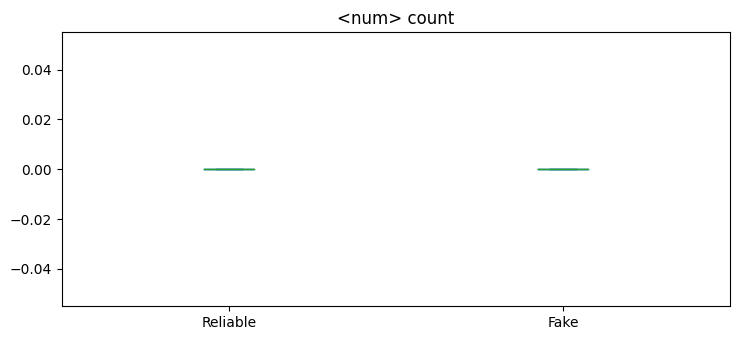

In [4]:
count_and_plot("../datasets/10k_cleaned.csv", "../datasets/10k_cleaned_num_count.csv", "<num>")

processed 200000 rows
finish time: 1.5603320598602295
Length 10000


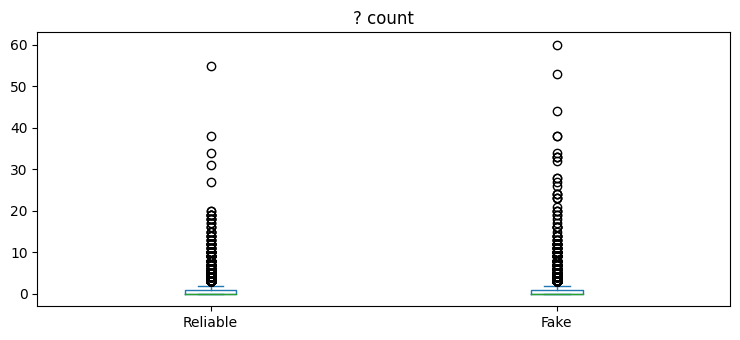

In [5]:
#Question mark count
count_and_plot("../datasets/10k_cleaned.csv", "../datasets/10k_cleaned_q_count.csv", "?")

processed 200000 rows
finish time: 2.239267110824585
Length 10000


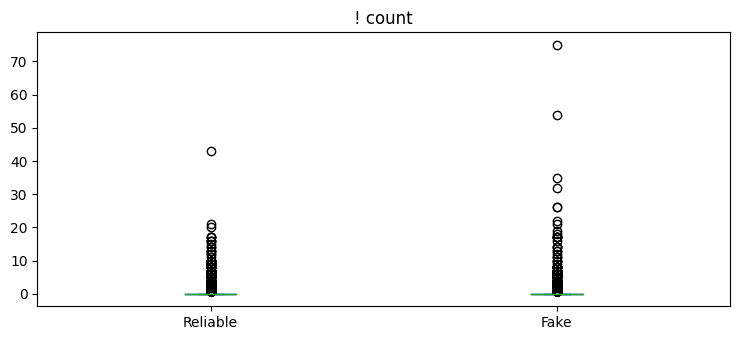

In [6]:
#Exclamation mark count
count_and_plot("../datasets/10k_cleaned.csv", "../datasets/10k_cleaned_q_count.csv", "!")

In [7]:
#Content length
def word_count(file, new_file):
    wc = s.word_count()
    pp.apply_pipeline(file, [
        (wc, None, "word count")
        #(pp.Binary_labels(), "type")
    ], new_file=new_file
    )
    df = pp.apply_pipeline(file, [], 
        batch_size=10000,
        get_batch=True
    )
    true = df[df["type"] == True]["word count"]
    false = df[df["type"] == False]["word count"]
        
    s.boxplot(true, false, "Word count")

#word_count("../datasets/100k-raw.csv", "../datasets/100k-raw-word-count.csv")

In [ ]:
df = pd.read_csv("../datasets/liar_dataset/")